## Test with your video name uploaded from relevant drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [30]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [0]:
g=5 ## Change this everytime else it will overwrite your original plots and json files
video_name='Test_5.avi' ## Input your video name
model_type='NN' ## NN for developed architecture, TL for transfer learning model

## Load Test Video

In [209]:

!pip install mlxtend
import mlxtend
from mlxtend.image import extract_face_landmarks

In [0]:

def eye_aspect_ratio(eye):
	
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [0]:

def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

In [0]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [0]:
def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

In [0]:

def jaw_dist(jaw,nose):
  list= np.array([distance.euclidean(d, nose) for d in jaw])
  return list.max()/list.mean()



In [0]:
def getFrame(sec):
    start = 0
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    return hasFrames, image

In [0]:


def get_landmarks(vidcap):
  sec = 0
  frameRate = 0.5
  success, image = getFrame(sec)
  count = 0
  data=[]
  # labels=[]
  timestamp=[]
#     print('Count: '+str(count))
  while success and count < int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
      landmarks = extract_face_landmarks(image)
      try:
          sum(sum(landmarks))
          if sum(sum(landmarks)) != 0:
              count += 1
              data.append(landmarks)
              # labels.append([i])
              # cv2.imwrite("frame%d.jpg" % count, image)
              timestamp.append(sec)
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)

              # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          else:
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)
              print('Face not detected')
      except:
          # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          count=int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
          pass
      # print(count)
  return data,timestamp

In [217]:

from scipy.spatial import distance
import cv2
data = []
labels = []
frmes=[]
timestamp=[]
vidcap = cv2.VideoCapture(video_name)
data=get_landmarks(vidcap)[0]
timestamp=get_landmarks(vidcap)[1]


/usr/local/lib/python3.6/dist-packages/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


Face not detected
Face not detected


In [0]:
import numpy as np
import math
data = np.array(data)
features = []
main_list=[]
jaw_list=[]
for d in data:
    eye = d[36:68]
    nose=d[28]
    jaw=d[5:13]
    main_list.append(eye)
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    cir = circularity(eye)
    movt = jaw_dist(jaw,nose)
    mouth_eye = mouth_over_eye(eye)
    features.append([ear, mar, cir, mouth_eye,movt])

In [0]:
import pandas as pd
df_features=pd.DataFrame(features)

In [0]:
##Normalizing the input features
df_normalised=df_features.apply(lambda x: (x[0:5]-df_features.mean())/df_features.std(),axis=1)


In [0]:
## Merging to create a new dataframe
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)


In [0]:
try:
  inp=df.to_numpy().reshape(int(df.shape[0]/2),2,10)
except:
  inp=df[:-1].to_numpy().reshape(int(df.shape[0]/2),2,10)
  timestamp=timestamp[:-1]

## Extract Images

In [0]:
j=0
import cv2
sec = 0
frameRate = 0.5
all_image=[]
full_timestamp=[]
success, image = getFrame(sec)
resized_image = cv2.resize(image, (224, 224))
all_image.append(resized_image)
full_timestamp.append(sec)
count = 0
while success and count < int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
  count += 1
  # cv2.imwrite('/content/drive/My Drive/CSCE_689/Test_video/'+format(j)+str(".jpg"), image)
  sec = sec + frameRate
  sec = round(sec, 3)
  success, image = getFrame(sec)
  try:
    resized_image = cv2.resize(image, (224, 224))
    all_image.append(resized_image)
    full_timestamp.append(sec)

  except:
    pass
  j=j+1
            

## Load Model

In [224]:
from tensorflow.keras.models import load_model
# load json and create model
if model_type=='NN':
  loaded_model=load_model("model1.h5")
  print("Loaded NN model from disk")
else:
  loaded_model=load_model('vgg16_2.h5')
  print("Loaded TL model from disk")

Loaded NN model from disk


## Evaluate

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:

if model_type=='NN':
  pred_rnn = loaded_model.predict_classes(inp)
  y_score_10 = loaded_model.predict_proba(inp)
else:
  y_score_10=[]
  for i in all_image:
    img = np.asarray(i)
    img = np.expand_dims(img, axis=0)
    output = loaded_model.predict(img)
    y_score_10.append(output[0][1])
  pred_rnn=[1 if d > 0.5 else 0 for d in y_score_10]

In [0]:
pred=np.array([pred_rnn[i//2] for i in range(len(pred_rnn)*2)])

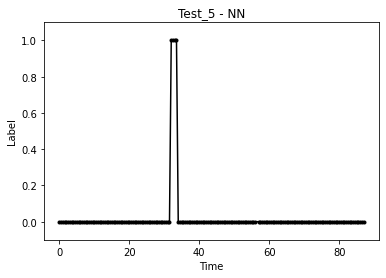

In [228]:
import matplotlib.pyplot as plt
if model_type=='NN': 
  fig = plt.figure()
  plt.plot(timestamp,pred,marker = '.', color = "Black")
  plt.xlabel("Time")
  plt.ylim(-0.1,1.1)
  plt.ylabel("Label")
  plt.title("Test_"+str(g)+" - NN")
  plt.show()
  fig.savefig("Test" +str(g)+" - NN.png")
else:
  fig = plt.figure()
  plt.plot(full_timestamp,pred_rnn,marker = '.', color = "Black")
  plt.xlabel("Time")
  plt.ylim(-0.1,1.1)
  plt.ylabel("Label")
  plt.title("Test_"+str(g)+" - TL")
  plt.show()
  fig.savefig("Test" +str(g)+" - TL.png")

In [0]:
json_data=pd.DataFrame()
if model_type=='NN':
  json_data['time']=timestamp
  json_data['label']=pred
else:
  json_data['time']=full_timestamp
  json_data['label']=pred_rnn  

In [0]:
json_data.to_json("timeLabel_test"+str(g)+" "+str(model_type)+".json")